<a href="https://colab.research.google.com/github/harshith10valiveti/LinearRegression-FastAPI/blob/main/Boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
df = pd.read_csv('boston.csv')

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
#handling the missing values
df.fillna(df.mean(), inplace=True)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Checking for negative values in 'MEDV' (should not exist)
print(df[df['MEDV'] < 0])

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


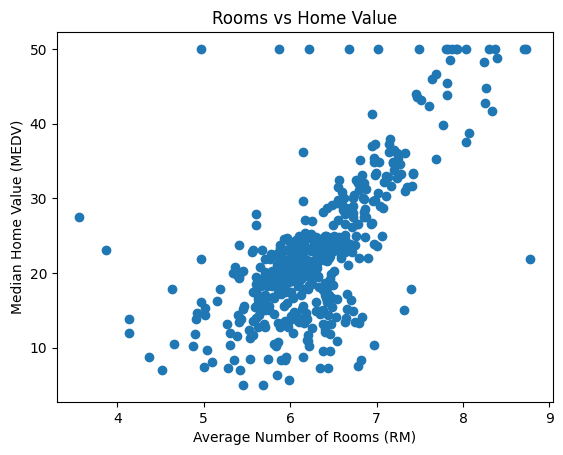

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Home Value (MEDV)')
plt.title('Rooms vs Home Value')
plt.show()


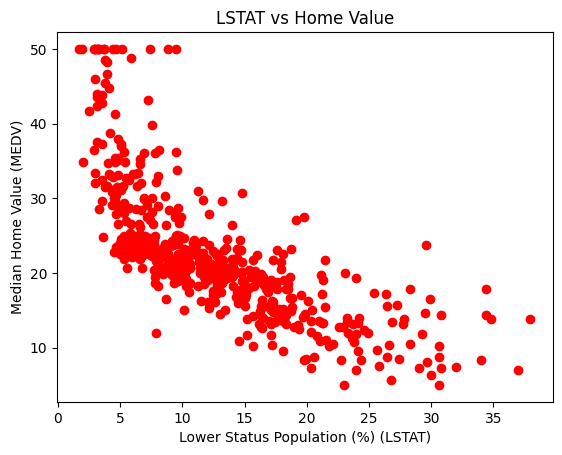

In [ ]:
plt.scatter(df['LSTAT'], df['MEDV'], color='red')
plt.xlabel('Lower Status Population (%) (LSTAT)')
plt.ylabel('Median Home Value (MEDV)')
plt.title('LSTAT vs Home Value')
plt.show()

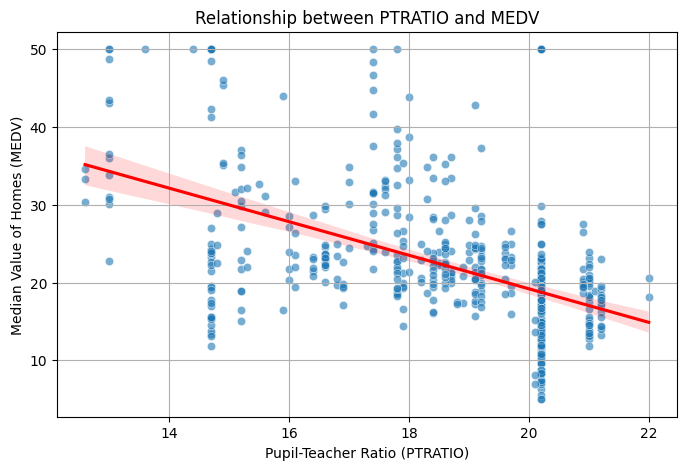

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PTRATIO', y='MEDV', data=df, alpha=0.6)

# regression line
sns.regplot(x='PTRATIO', y='MEDV', data=df, scatter=False, color='red')

plt.title("Relationship between PTRATIO and MEDV")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.grid(True)
plt.show()

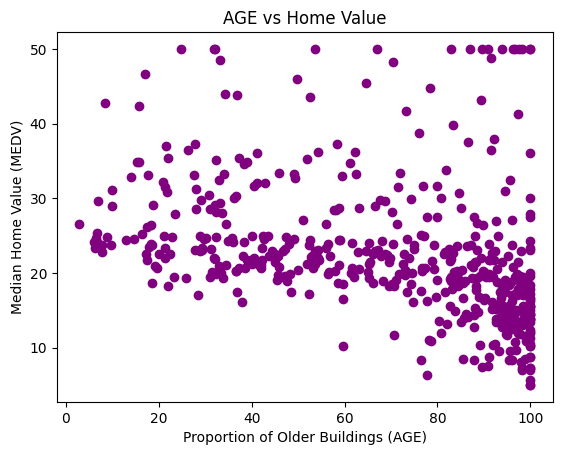

In [ ]:
plt.scatter(df['AGE'], df['MEDV'], color='purple')
plt.xlabel('Proportion of Older Buildings (AGE)')
plt.ylabel('Median Home Value (MEDV)')
plt.title('AGE vs Home Value')
plt.show()

In [ ]:
# Feature selection
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R² Score: 0.6302528487272827
MAE: 3.3325380783240957
RMSE: 5.207202455789536


In [ ]:

home1 = pd.DataFrame([[6.5, 12.0, 18.0]], columns=['RM', 'LSTAT', 'PTRATIO'])

predicted_price = model.predict(home1)[0]

print(f"Predicted Price for Home with RM=6.5, LSTAT=12.0, PTRATIO=18.0: ${predicted_price * 1000:.2f}")


Predicted Price for Home with RM=6.5, LSTAT=12.0, PTRATIO=18.0: $24240.15


In [ ]:
import joblib
joblib.dump(model, 'boston_model.pkl')

['boston_model.pkl']